# Proyek Analisis Data: Bike-Sharing-Dataset
- **Nama:** Bani Adam Tampubolon
- **Email:** baniadam.tampubolon@gmail.com
- **ID Dicoding:** baniadam_tampubolon

## Menentukan Pertanyaan Bisnis

- **Pertanyaan 1:**   
Apakah terdapat perbedaan pola peminjaman sepeda antara musim semi, musim panas, musim gugur, dan musim dingin?

- **Pertanyaan 2:**  
Bagaimana pengaruh waktu hari terhadap jumlah sepeda yang disewa? Misalnya, apakah peminjaman sepeda cenderung lebih tinggi pada pagi hari atau sore hari?

- **Pertanyaan Tambahan:**  
Bagaimana korelasi antara suhu/temperatur dengan banyaknya peminjaman sepeda?

In [249]:
all_df = pd.merge(
    left = day_df,
    right = hour_df,
    how = "left",
    left_on = "instant",
    right_on = "instant"
)
all_df.head()

,instant,dteday_x,season_x,yr_x,mnth_x,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,...,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y,Time_Category
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,0,1,0.24,0.2879,0.81,0.0,3,13,16,Malam
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,...,0,1,0.22,0.2727,0.80,0.0,8,32,40,Dini Hari
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,...,0,1,0.22,0.2727,0.80,0.0,5,27,32,Dini Hari
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,...,0,1,0.24,0.2879,0.75,0.0,3,10,13,Dini Hari
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,...,0,1,0.24,0.2879,0.75,0.0,0,1,1,Dini Hari


In [251]:
all_df.to_csv("all_data.csv", index=False)

## Import Semua Packages/Library yang Digunakan

In [201]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Data Wrangling

In [202]:
# Memuat Tabel day

day_df = pd.read_csv("Bike-sharing-dataset/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [203]:
# Memuat Tabel hour

hour_df = pd.read_csv("Bike-sharing-dataset/hour.csv")
hour_df.head()


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assesing Data

In [204]:
# Memeriksa tipe data dari day_df

day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [205]:
# Menampilkan informasi terkait jumlah "Missing Value"

day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [206]:
# Print Jumlah Duplikasi Data dari day_df

print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [207]:
# Memeriksa tipe data dari hour_df

hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [208]:
# Memeriksa informasi mengenai "Missing Value"

hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [209]:
# Print jumlah duplikasi data dari hour_df

print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [210]:
# Memeriksa parameter statistik yang terdapat pada day_df

day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [211]:
# Memeriksa parameter statistik yang terdapat pada hour_df

hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [212]:
# memeriksa duplikasi dan ringkasan parameter statistik dari kolom numerik pada day_df

print("Jumlah duplikasi: ", day_df.duplicated().sum())
day_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [213]:
# memeriksa duplikasi dan ringkasan parameter statistik dari kolom numerik pada hour_df

print("Jumlah duplikasi: ", hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

In [214]:
# Mengubah tipe data dteday pada day_df

datetime_columns = ["dteday"]
 
for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

In [215]:
# Memeriksa hasil perubahan tipe data pada day_df

day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [216]:
# Mengubah tipe data dteday pada hour_df

datetime_columns = ["dteday"]
 
for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

In [217]:
# Memeriksa hasil perubahan tipe data pada hour_df

hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

### Exploratory Data Analysis (EDA)

In [218]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [219]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


### Exploratory Analysis Pertanyaan 1.  
Apakah terdapat perbedaan pola peminjaman sepeda antara musim semi, musim panas, musim gugur, dan musim dingin?

### Explore ...

#### 1.1 Mencari jumlah peminjaman sepeda dari tiap musim

In [220]:
# Membuat fungsi untuk menampilkan data melalui persentase (%)

def hitung_persentase(jumlah, total):
    return (jumlah / total) * 100

grouped_season = day_df.groupby('season')

total_rental_per_season = grouped_season['cnt'].sum()

for season, total_rentals in total_rental_per_season.items():
    if season == 1:
        print("Musim semi\t:", total_rentals, "orang")
    elif season == 2:
        print("Musim panas\t:", total_rentals, "orang")
    elif season == 3:
        print("Musim gugur\t:", total_rentals, "orang")
    elif season == 4:
        print("Musim dingin\t:", total_rentals, "orang")



Musim semi	: 471348 orang
Musim panas	: 918589 orang
Musim gugur	: 1061129 orang
Musim dingin	: 841613 orang


#### 1.2 Menghitung presentase peminjaman sepeda pada tiap musim

In [221]:
# Menghitung total peminjaman sepeda untuk semua musim
total_peminjaman_semua_musim = total_rental_per_season.sum()

# Menghitung persentase peminjaman sepeda untuk tiap musim
print("Persentase Peminjaman Sepeda")
for season, total_rentals in total_rental_per_season.items():
    if season == 1:
        persentase = round((total_rentals / total_peminjaman_semua_musim) * 100, 2)
        print("Musim Semi\t:", persentase, "%")
    elif season == 2:
        persentase = round((total_rentals / total_peminjaman_semua_musim) * 100, 2)
        print("Musim Panas\t:", persentase, "%")
    elif season == 3:
        persentase = round((total_rentals / total_peminjaman_semua_musim) * 100, 2)
        print("Musim Gugur\t:", persentase, "%")
    elif season == 4:
        persentase = round((total_rentals / total_peminjaman_semua_musim) * 100, 2)
        print("Musim Dingin\t:", persentase, "%")



Persentase Peminjaman Sepeda
Musim Semi	: 14.32 %
Musim Panas	: 27.9 %
Musim Gugur	: 32.23 %
Musim Dingin	: 25.56 %


#### 1.3 Menghitung total peminjaman sepeda pada tiap musim di tahun 2011

In [222]:
# Memisahkan data berdasarkan tahun
data_2011 = day_df[day_df['yr'] == 0]
data_2012 = day_df[day_df['yr'] == 1]



In [223]:
# Mengelompokkan data untuk tahun 2011 berdasarkan musim
grouped_season_2011 = data_2011.groupby('season')
total_rental_per_season_2011 = grouped_season_2011['cnt'].sum()

print("Peminjaman sepeda per musim untuk tahun 2011:")
for season, total_rentals in total_rental_per_season_2011.items():
    if season == 1:
        print("Musim semi \t:", total_rentals, "orang")
    elif season == 2:
        print("Musim panas \t:", total_rentals, "orang")
    elif season == 3:
        print("Musim gugur \t:", total_rentals, "orang")
    elif season == 4:
        print("Musim dingin \t:", total_rentals, "orang")

Peminjaman sepeda per musim untuk tahun 2011:
Musim semi 	: 150000 orang
Musim panas 	: 347316 orang
Musim gugur 	: 419650 orang
Musim dingin 	: 326137 orang


#### 1.4. Menghitung persentase peminjaman sepeda pada tiap musim di tahun 2011

In [224]:
## Menghitung total peminjaman sepeda untuk semua musim pada tahun 2011
total_peminjaman_semua_musim_2011 = total_rental_per_season_2011.sum()

# Menghitung persentase peminjaman sepeda untuk tiap musim pada tahun 2011
print("Persentase peminjaman sepeda tiap musim pada 2011:")
for season, total_rentals in total_rental_per_season_2011.items():
    if season == 1:
        persentase = round((total_rentals / total_peminjaman_semua_musim_2011) * 100, 2)
        print("Musim Semi\t:", persentase, "%")
    elif season == 2:
        persentase = round((total_rentals / total_peminjaman_semua_musim_2011) * 100, 2)
        print("Musim Panas\t:", persentase, "%")
    elif season == 3:
        persentase = round((total_rentals / total_peminjaman_semua_musim_2011) * 100, 2)
        print("Musim Gugur\t:", persentase, "%")
    elif season == 4:
        persentase = round((total_rentals / total_peminjaman_semua_musim_2011) * 100, 2)
        print("Musim Dingin\t:", persentase, "%")


Persentase peminjaman sepeda tiap musim pada 2011:
Musim Semi	: 12.07 %
Musim Panas	: 27.94 %
Musim Gugur	: 33.76 %
Musim Dingin	: 26.24 %


#### 1.5. Menghitung total peminjaman sepeda pada tiap musim di tahun 2012

In [225]:
# Mengelompokkan data untuk tahun 2012 berdasarkan musim
grouped_season_2012 = data_2012.groupby('season')
total_rental_per_season_2012 = grouped_season_2012['cnt'].sum()

print("\nPeminjaman sepeda per musim untuk tahun 2012:")
for season, total_rentals in total_rental_per_season_2012.items():
    if season == 1:
        print("Musim semi \t:", total_rentals, "orang")
    elif season == 2:
        print("Musim panas \t:", total_rentals, "orang")
    elif season == 3:
        print("Musim gugur \t:", total_rentals, "orang")
    elif season == 4:
        print("Musim dingin \t:", total_rentals, "orang")


Peminjaman sepeda per musim untuk tahun 2012:
Musim semi 	: 321348 orang
Musim panas 	: 571273 orang
Musim gugur 	: 641479 orang
Musim dingin 	: 515476 orang


#### 1.6. Menghitung persentase peminjaman sepeda pada tiap musim di tahun 2012

In [226]:
# Menghitung total peminjaman sepeda untuk semua musim pada tahun 2012
total_peminjaman_semua_musim_2012 = total_rental_per_season_2012.sum()

# Menghitung persentase peminjaman sepeda untuk tiap musim pada tahun 2012
print("Persentase peminjaman sepeda tiap musim pada 2012:")
for season, total_rentals in total_rental_per_season_2012.items():
    if season == 1:
        persentase = round((total_rentals / total_peminjaman_semua_musim_2012) * 100, 2)
        print("Musim Semi\t:", persentase, "%")
    elif season == 2:
        persentase = round((total_rentals / total_peminjaman_semua_musim_2012) * 100, 2)
        print("Musim Panas\t:", persentase, "%")
    elif season == 3:
        persentase = round((total_rentals / total_peminjaman_semua_musim_2012) * 100, 2)
        print("Musim Gugur\t:", persentase, "%")
    elif season == 4:
        persentase = round((total_rentals / total_peminjaman_semua_musim_2012) * 100, 2)
        print("Musim Dingin\t:", persentase, "%")


Persentase peminjaman sepeda tiap musim pada 2012:
Musim Semi	: 15.68 %
Musim Panas	: 27.87 %
Musim Gugur	: 31.3 %
Musim Dingin	: 25.15 %


### Exploratory Analysis Pertanyaan 2  
Bagaimana pengaruh waktu hari terhadap jumlah sepeda yang disewa? Misalnya, apakah peminjaman sepeda cenderung lebih tinggi pada pagi hari atau sore hari?

### Explore ...

#### 2.1. Menampilkan jumlah peminjam pada tiap jam per hari berdasarkan nilai unique (nunique)

In [227]:
# Menampilkan jumlah peminjaman sepeda tiap jam per hari

hour_df.groupby(by="hr").cnt.nunique()

hr
0     162
1     120
2     100
3      60
4      25
5      58
6     187
7     374
8     467
9     322
10    312
11    337
12    383
13    377
14    385
15    383
16    414
17    494
18    471
19    423
20    360
21    294
22    252
23    196
Name: cnt, dtype: int64

##### 2.1.1. Menampilkan hasil statistika berdasarkan nilai unique

In [228]:
# Simpan hasil output sebagai DataFrame
result_df = pd.DataFrame(hour_df.groupby(by="hr").cnt.nunique())

# Hitung statistika
statistics_1 = result_df.describe(include="all")

# Tampilkan statistika
print(statistics_1)


              cnt
count   24.000000
mean   289.833333
std    142.580768
min     25.000000
25%    180.750000
50%    329.500000
75%    383.500000
max    494.000000


#### 2.2. Menampilkan TOTAL peminjaman sepeda berdasarkan jam

In [229]:
# Menampilkan total peminjaman sepeda berdasarkan jam
grouped_hour = hour_df.groupby('hr')

total_rentals_per_hour = grouped_hour['cnt'].sum()

print(total_rentals_per_hour)

hr
0      39130
1      24164
2      16352
3       8174
4       4428
5      14261
6      55132
7     154171
8     261001
9     159438
10    126257
11    151320
12    184414
13    184919
14    175652
15    183149
16    227748
17    336860
18    309772
19    226789
20    164550
21    125445
22     95612
23     63941
Name: cnt, dtype: int64


##### 2.2.1. Menampilkan nilai statistika berdasarkan total peminjaman

In [230]:
# Simpan hasil output sebagai DataFrame
result_df = pd.DataFrame(total_rentals_per_hour)

# Hitung statistika
statistics_2 = result_df.describe(include="all")

# Tampilkan statistika
print(statistics_2)


                 cnt
count      24.000000
mean   137194.958333
std     95894.380180
min      4428.000000
25%     51131.500000
50%    152745.500000
75%    184540.250000
max    336860.000000


#### 2.3. Membuat kategori berdasarkan waktu, yaitu pagi, siang, sore, malam, dan dini hari 

In [231]:
# Mengubah nilai jam (hour) 0 menjadi 24 untuk kemudahan perhitungan
hour_df['hr'] = hour_df['hr'].replace({0: 24})

# Membuat fungsi untuk mengelompokkan waktu dalam kategori yang ditentukan
def categorize_time(hr):
    if 5 <= hr <= 10:
        return 'Pagi'
    elif 11 <= hr <= 14:
        return 'Siang'
    elif 15 <= hr <= 18:
        return 'Sore'
    elif 19 <= hr <= 24:
        return 'Malam'
    elif 1 <= hr <= 4:
        return 'Dini Hari'

# Mengelompokkan data berdasarkan kategori waktu
hour_df['Time_Category'] = hour_df['hr'].apply(categorize_time)

# Mengelompokkan data berdasarkan kategori waktu dan menghitung total peminjaman sepeda
rentals_by_time = hour_df.groupby('Time_Category')['cnt'].sum()

# Menampilkan hasil
print("Jumlah peminjaman sepeda berdasarkan kategori waktu:")
print(rentals_by_time)


Jumlah peminjaman sepeda berdasarkan kategori waktu:
Time_Category
Dini Hari      53118
Malam         715467
Pagi          770260
Siang         696305
Sore         1057529
Name: cnt, dtype: int64


#### 2.4. Mencari persentase peminjaman berdasarkan waktu, yaitu pagi, siang, sore, malam, dan dini hari 

In [232]:
# Menghitung persentase peminjaman sepeda untuk setiap kategori waktu
percent_rentals_by_time = (rentals_by_time / total_rentals_all_times) * 100

# Menampilkan hasil dengan menggunakan round
print("Persentase peminjaman sepeda berdasarkan kategori waktu:")
for time_category, percentage in percent_rentals_by_time.items():
    rounded_percentage = round(percentage, 2)
    if time_category == 'Dini Hari':
        print(f"{time_category}: {rounded_percentage}%")
    else:
        print(f"{time_category}\t: {rounded_percentage}%")


Persentase peminjaman sepeda berdasarkan kategori waktu:
Dini Hari: 1.61%
Malam	: 21.73%
Pagi	: 23.39%
Siang	: 21.15%
Sore	: 32.12%


### Exploratory Analyst Pertanyaan Tambahan

#### 2.5. Korelasi banyaknya peminjaman sepeda terhadap suhu/temperatur.
Karena saya merasa peminjaman sepeda paling diminati saat sore hari, maka saya mencoba menganalisa banyaknya peminjaman terhadap suhu udara



In [233]:
# Menampilkan jumlah peminjaman sepeda tiap jam per hari terhadap suhu
original_temp = hour_df['temp']*41

hour_df.groupby(by=original_temp).cnt.nunique()

temp
0.82      13
1.64      12
2.46      15
3.28      16
4.10      39
4.92      56
5.74      78
6.56     116
7.38      96
8.20     157
9.02     159
9.84     186
10.66    219
11.48    172
12.30    264
13.12    276
13.94    282
14.76    304
15.58    241
16.40    308
17.22    302
18.04    269
18.86    300
19.68    217
20.50    302
21.32    333
22.14    326
22.96    343
23.78    212
24.60    373
25.42    385
26.24    386
27.06    386
27.88    234
28.70    408
29.52    378
30.34    346
31.16    299
31.98    150
32.80    251
33.62    179
34.44    123
35.26    114
36.08     51
36.90     79
37.72     46
38.54     17
39.36     15
40.18      1
41.00      1
Name: cnt, dtype: int64

#### 2.6. Mendapatkan hasil statistika antara penjualan berdasarkan suhu

In [234]:
# Simpan hasil output sebagai DataFrame
result_df = pd.DataFrame(hour_df.groupby(by=original_temp).cnt.nunique())

# Hitung statistika
statistics_original_temp = result_df.describe()

# Tampilkan statistika
print(statistics_original_temp)

              cnt
count   50.000000
mean   196.700000
std    129.348012
min      1.000000
25%     78.250000
50%    214.500000
75%    302.000000
max    408.000000


#### 2.7. Menampilkan total peminjaman sepeda berdasarkan suhu

In [235]:
# Menampilkan total peminjaman sepeda berdasarkan suhu
grouped_temp = hour_df.groupby(original_temp)

total_rentals_by_temp = grouped_temp['cnt'].sum()

print(total_rentals_by_temp)

temp
0.82        712
1.64        570
2.46        672
3.28        480
4.10       2514
4.92       4440
5.74       7605
6.56      15083
7.38       9318
8.20      28230
9.02      29434
9.84      41843
10.66     49170
11.48     32132
12.30     74303
13.12     82015
13.94     87274
14.76     99202
15.58     61087
16.40    102809
17.22     96087
18.04     80566
18.86     91065
19.68     54845
20.50    105366
21.32    112850
22.14    113962
22.96    123756
23.78     67730
24.60    149905
25.42    148185
26.24    154985
27.06    156204
27.88     73129
28.70    177298
29.52    163449
30.34    161587
31.16    135660
31.98     52930
32.80    112897
33.62     72354
34.44     44963
35.26     42307
36.08     19274
36.90     27836
37.72     15681
38.54      3690
39.36      4392
40.18       539
41.00       294
Name: cnt, dtype: int64


## Visualization & Explanatory Analysis

#### Opening: Tren peminjaman sepeda pada tahun 2011 dan 2012

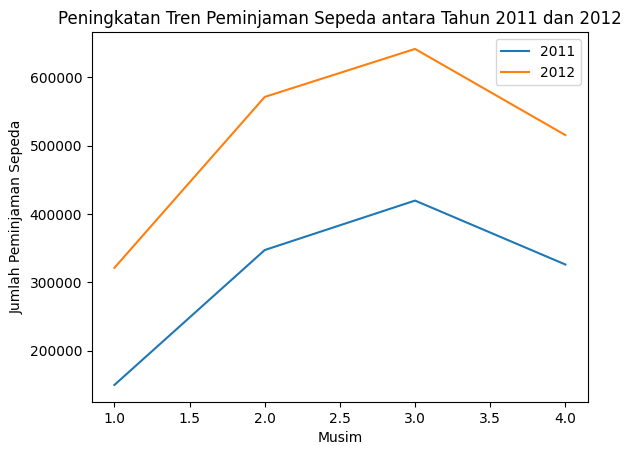

In [236]:
plt.plot(season_grouped_2011.index, season_grouped_2011.values, label='2011')
plt.plot(season_grouped_2012.index, season_grouped_2012.values, label='2012')
plt.xlabel('Musim')
plt.ylabel('Jumlah Peminjaman Sepeda')
plt.title('Peningkatan Tren Peminjaman Sepeda antara Tahun 2011 dan 2012')
plt.legend()
plt.show()

### Pertanyaan 1:
Apakah terdapat perbedaan pola peminjaman sepeda antara musim semi, musim panas, musim gugur, dan musim dingin?

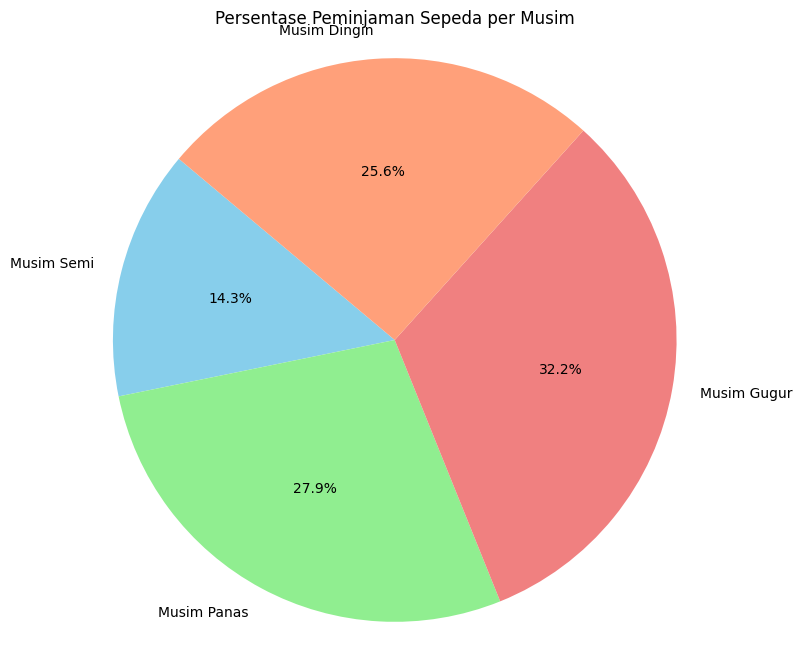

In [237]:
# Data persentase peminjaman sepeda untuk tiap musim
season_labels = ['Musim Semi', 'Musim Panas', 'Musim Gugur', 'Musim Dingin']
percentages = []
for season, total_rentals in total_rental_per_season.items():
    percentage = round((total_rentals / total_peminjaman_semua_musim) * 100, 2)
    percentages.append(percentage)

# Membuat plot
plt.figure(figsize=(8, 8))
plt.pie(percentages, labels=season_labels, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon'])
plt.title('Persentase Peminjaman Sepeda per Musim')
plt.axis('equal')  # Membuat lingkaran menjadi lingkaran sempurna
plt.show()


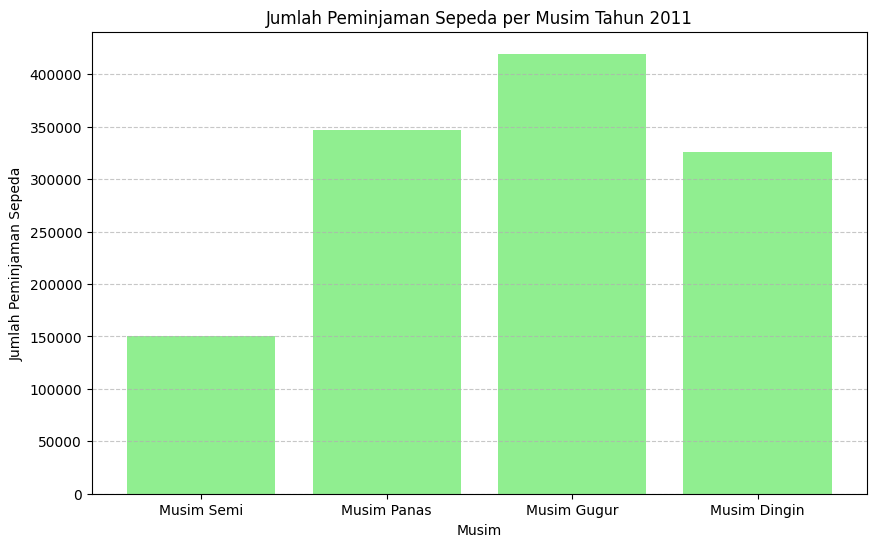

In [238]:
# Data jumlah peminjaman sepeda per musim tahun 2011
seasons_2011 = ['Musim Semi', 'Musim Panas', 'Musim Gugur', 'Musim Dingin']
total_rentals_2011 = [total_rentals for season, total_rentals in total_rental_per_season_2011.items()]

# Membuat plot
plt.figure(figsize=(10, 6))
plt.bar(seasons_2011, total_rentals_2011, color='lightgreen')
plt.title('Jumlah Peminjaman Sepeda per Musim Tahun 2011')
plt.xlabel('Musim')
plt.ylabel('Jumlah Peminjaman Sepeda')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Persentase peminjaman sepeda tiap musim pada 2011:
1: 12.07%
2: 27.94%
3: 33.76%
4: 26.24%


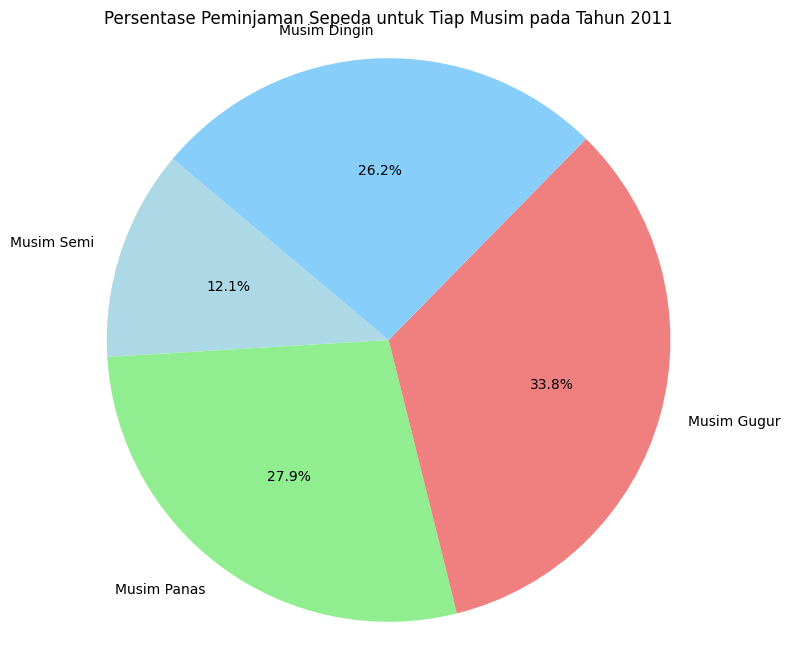

In [239]:
# Data persentase peminjaman sepeda untuk tiap musim pada tahun 2011
seasons = ['Musim Semi', 'Musim Panas', 'Musim Gugur', 'Musim Dingin']
percentages = []

# Menghitung persentase peminjaman sepeda untuk tiap musim pada tahun 2011
print("Persentase peminjaman sepeda tiap musim pada 2011:")
for season, total_rentals in total_rental_per_season_2011.items():
    persentase = round((total_rentals / total_peminjaman_semua_musim_2011) * 100, 2)
    percentages.append(persentase)
    print(f"{season}: {persentase}%")

# Membuat plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(percentages, labels=seasons, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue'])
plt.title('Persentase Peminjaman Sepeda untuk Tiap Musim pada Tahun 2011')
plt.axis('equal')  # Membuat pie chart menjadi lingkaran
plt.show()

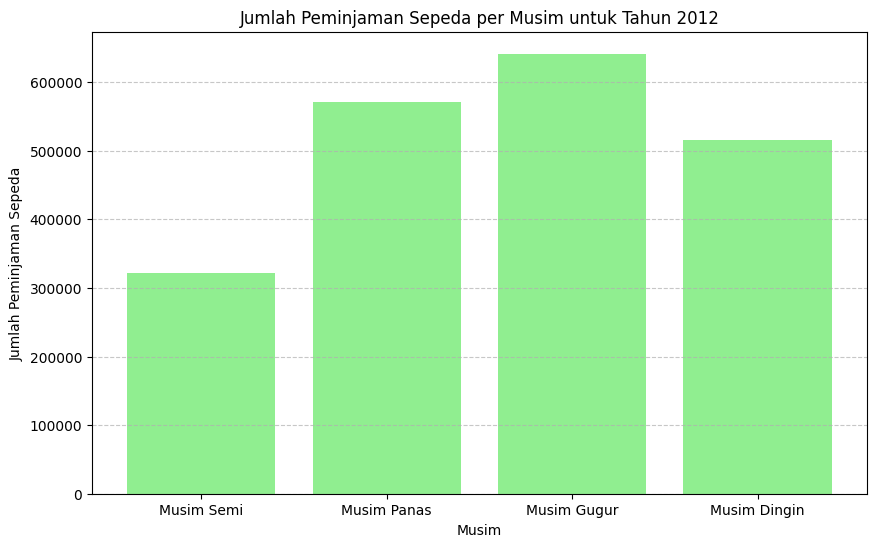

In [240]:
# Data jumlah peminjaman sepeda per musim untuk tahun 2012
seasons = ['Musim Semi', 'Musim Panas', 'Musim Gugur', 'Musim Dingin']
total_rentals_2012 = [total_rentals for season, total_rentals in total_rental_per_season_2012.items()]

# Membuat plot
plt.figure(figsize=(10, 6))
plt.bar(seasons, total_rentals_2012, color='lightgreen')
plt.title('Jumlah Peminjaman Sepeda per Musim untuk Tahun 2012')
plt.xlabel('Musim')
plt.ylabel('Jumlah Peminjaman Sepeda')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Persentase peminjaman sepeda tiap musim pada 2012:
1: 15.68%
2: 27.87%
3: 31.3%
4: 25.15%


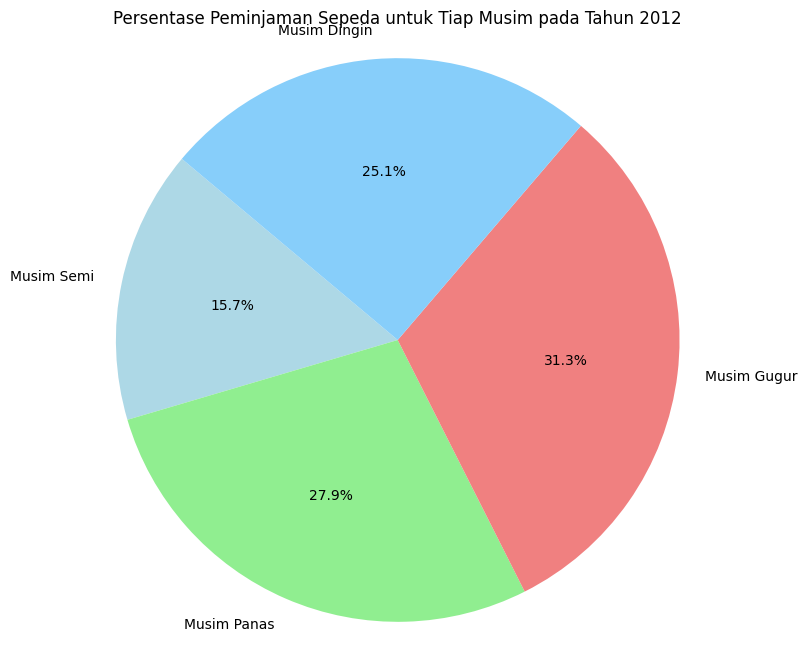

In [241]:
# Data persentase peminjaman sepeda untuk tiap musim pada tahun 2012
seasons = ['Musim Semi', 'Musim Panas', 'Musim Gugur', 'Musim Dingin']
percentages = []

# Menghitung persentase peminjaman sepeda untuk tiap musim pada tahun 2012
print("Persentase peminjaman sepeda tiap musim pada 2012:")
for season, total_rentals in total_rental_per_season_2012.items():
    persentase = round((total_rentals / total_peminjaman_semua_musim_2012) * 100, 2)
    percentages.append(persentase)
    print(f"{season}: {persentase}%")

# Membuat plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(percentages, labels=seasons, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue'])
plt.title('Persentase Peminjaman Sepeda untuk Tiap Musim pada Tahun 2012')
plt.axis('equal')  # Membuat pie chart menjadi lingkaran
plt.show()

### Pertanyaan 2:
Bagaimana pengaruh waktu hari terhadap jumlah sepeda yang disewa? Misalnya, apakah peminjaman sepeda cenderung lebih tinggi pada pagi hari atau sore hari?

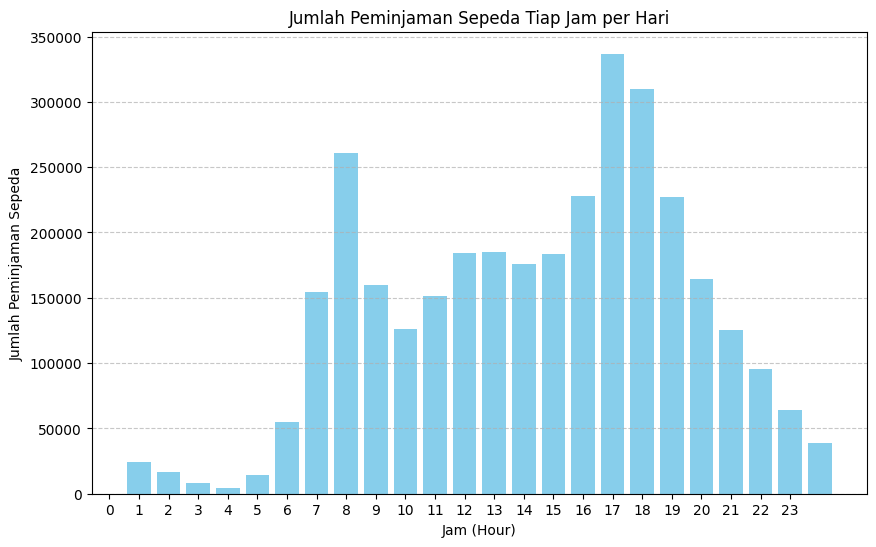

In [242]:
# Menampilkan jumlah peminjaman sepeda tiap jam per hari
hourly_rentals = hour_df.groupby(by="hr")['cnt'].sum()

# Membuat plot histogram
plt.figure(figsize=(10, 6))
plt.bar(hourly_rentals.index, hourly_rentals.values, color='skyblue')
plt.title('Jumlah Peminjaman Sepeda Tiap Jam per Hari')
plt.xlabel('Jam (Hour)')
plt.ylabel('Jumlah Peminjaman Sepeda')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(range(24))
plt.show()

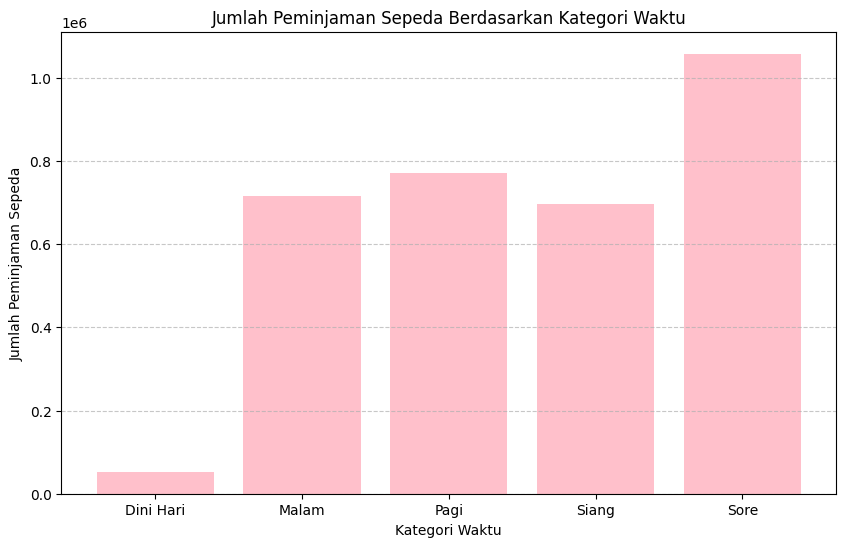

In [243]:
# Data jumlah peminjaman sepeda berdasarkan kategori waktu
categories = rentals_by_time.index.tolist()
rentals_counts = rentals_by_time.tolist()

# Membuat plot diagram batang
plt.figure(figsize=(10, 6))
plt.bar(categories, rentals_counts, color='pink')
plt.title('Jumlah Peminjaman Sepeda Berdasarkan Kategori Waktu')
plt.xlabel('Kategori Waktu')
plt.ylabel('Jumlah Peminjaman Sepeda')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

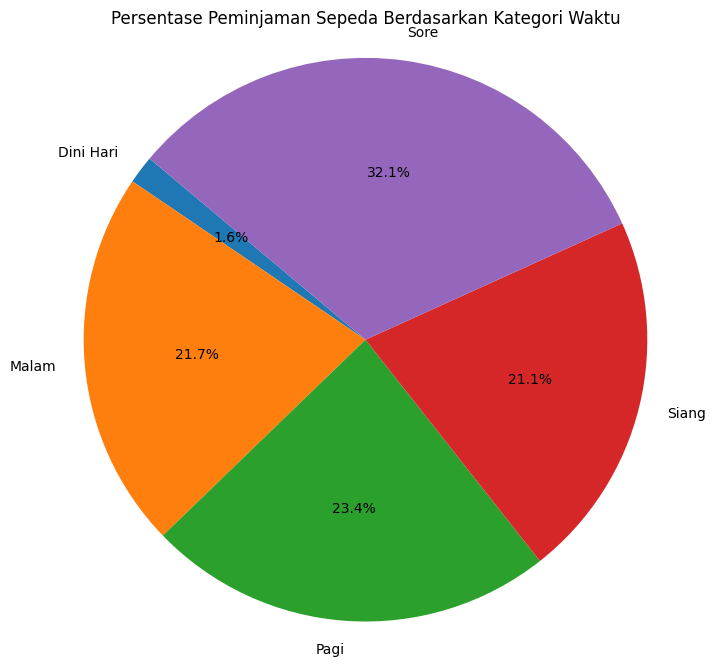

In [244]:
# Data persentase peminjaman sepeda untuk setiap kategori waktu
time_categories = percent_rentals_by_time.index.tolist()
percentages = percent_rentals_by_time.tolist()

# Membuat plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(percentages, labels=time_categories, autopct='%1.1f%%', startangle=140)
plt.title('Persentase Peminjaman Sepeda Berdasarkan Kategori Waktu')
plt.axis('equal')  # Membuat pie chart menjadi lingkaran
plt.show()

### Pertanyaan Tambahan

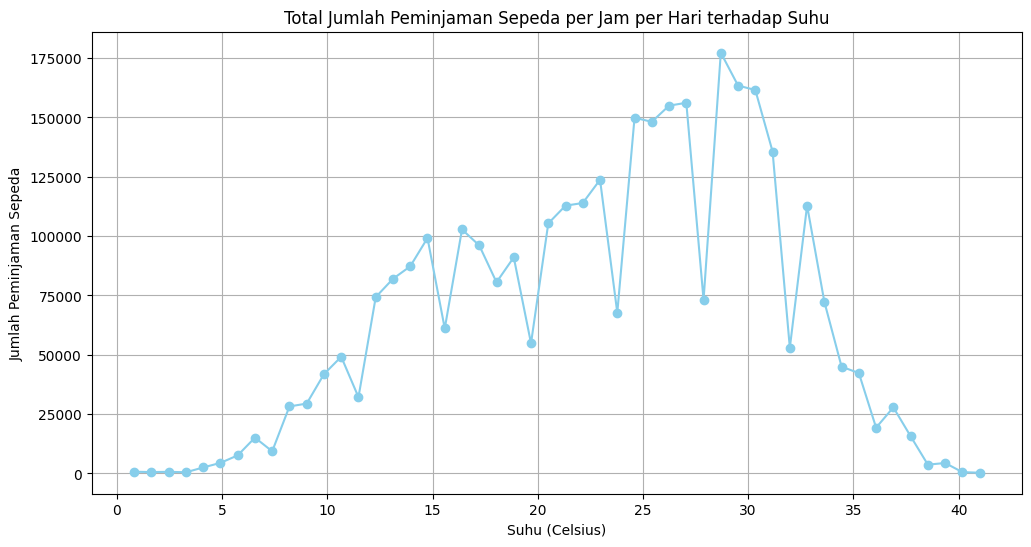

In [246]:
# Data jumlah peminjaman sepeda tiap jam per hari dan suhu
hourly_rentals_by_temp = hour_df.groupby(original_temp)['cnt'].sum()

# Membuat plot line
plt.figure(figsize=(12, 6))
hourly_rentals_by_temp.plot(kind='line', marker='o', color='skyblue')
plt.title('Total Jumlah Peminjaman Sepeda per Jam per Hari terhadap Suhu')
plt.xlabel('Suhu (Celsius)')
plt.ylabel('Jumlah Peminjaman Sepeda')
plt.grid(True)
plt.show()

## Conclusion
### Pertanyaan 1: 
#### Apakah terdapat perbedaan pola peminjaman sepeda antara musim semi, musim panas, musim gugur, dan musim dingin, dan apa penyebabnya?
Perbedaan pola peminjaman terjadi di musim yang berbeda beda, kebiasaan masyarakat disana ialah, mereka lebih sering bersepeda ketika musim gugur/semi tiba, hal ini dapat terjadi karena cuaca yang stabil dan suhu yang bersahabat untuk bersepeda, dan pola peminjaman ini juga sama pada tahun 2011 dan juga pada tahun 2012 yaitu peminjaman tertinggi adalah ketika musim semi/gugur tiba, hal ini juga sejalan terkait analisis korelasi suhu dan banyaknya peminat peminjaman sepeda, yaitu peminjaman akan mengalami peningkatan ketika suhu berada pada 24 sampai 32 derajat celcius.


### Pertanyaan 2:
#### Bagaimana pengaruh waktu hari terhadap jumlah sepeda yang disewa? Misalnya, apakah peminjaman sepeda cenderung lebih tinggi pada pagi hari atau sore hari?
Pola peminjaman sepeda juga berpengaruh pada waktu hari, peminjaman sepeda mengalami peningkatan peminjaman ketika sore hari dan pagi hari, peningkatan peminjaman terbesar terjadi pada sore hari terutama pada pukul 18.00 - 19.00, lalu di susul oleh peminjaman tertinggi kedua yaitu pada pagi hari yakni pada pukul 08.00, hal ini dapat terjadi karena beberapa hal, yaitu pada waktu hari tersebut (sore, dan pagi) udara masih terasa tidak terlalu panas untuk bersepeda, hal ini juga berkesinambungan dengan topik analisis "Pengaruh suhu/temperatur udara dengan banyaknya peminjaman sepeda", dan juga pada waktu tersebut orang-orang melakukan aktivitas bersantainya seperti olahraga, refreshing, dan lain-lain, dan alasan kedua adalah pada waktu hari tersebut (pagi dan sore) merupakan waktu dimana orang akan berangkat bekerja/sekolah, dan pulang dari kegiatannya, maka didasari hal itu lah peningkatan peminjaman sepeda dapat terjadi

### Pertanyaan Tambahan:
#### Bagaimana korelasi antara suhu/temperatur tehadap banyaknya peminjaman sepeda?
Pada grafik cukup menjelaskan bahwasanya suhu merupakan hal yang sangat mempengaruhi tren peminjaman sepeda, peminjaman sepeda mencapai titik tertingginya ketika suhu berada di kisaran angka 25 sampai 32 derajat celcius, sebaliknya saat suhu sangat dingin ataupun sangat panas jumlah peminjaman sepeda juga akan berkurang